## IMPORT

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.backend import clear_session
import numpy as np
import pandas as pd
import sklearn
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
print("We are using TensorFlow: ", tf.__version__)
print("We are using Keras: ", keras.__version__)

We are using TensorFlow:  2.6.0
We are using Keras:  2.6.0


## GPU Check

In [3]:
# Check if GPU works
print(tf.test.gpu_device_name())
# GPU cout and name
!nvidia-smi -L

/device:GPU:0
GPU 0: NVIDIA GeForce GTX 1050 Ti (UUID: GPU-fa68e8f4-96f0-d795-a3d2-b6344f49a27e)


In [4]:
# GPU activity
!nvidia-smi

Tue Aug  2 23:26:35 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 516.01       Driver Version: 516.01       CUDA Version: 11.7     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:08:00.0  On |                  N/A |
| 30%   35C    P0    N/A /  75W |    922MiB /  4096MiB |      7%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## MNIST

In [5]:
# Data downloading
(x_train, y_train),(x_val, y_val) = tf.keras.datasets.mnist.load_data()

In [6]:
# Data shape
print(x_train.shape)
print(y_train.shape)
print(y_train[:10])

(60000, 28, 28)
(60000,)
[5 0 4 1 9 2 1 3 1 4]


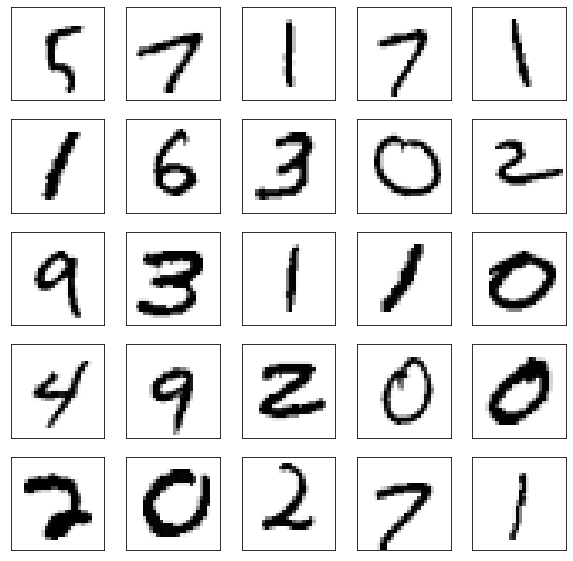

In [7]:
# Show Images
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i+100], cmap="Greys")


In [8]:
# Reshape Data
x_train_flat = x_train.reshape(-1, 28*28).astype(float)
print(x_train.shape, x_train_flat.shape)

x_val_flat =  x_val.reshape(-1, 28*28).astype(float)
print(x_val.shape, x_val_flat.shape)

(60000, 28, 28) (60000, 784)
(10000, 28, 28) (10000, 784)


In [9]:
# Rescaling Data
x_train_float = x_train_flat.astype(float) / 255 - 0.5
x_val_float = x_val_flat.astype(float) / 255 - 0.5

# # Without Rescaling
# x_train_float = x_train_flat.astype(float)
# x_val_float = x_val_flat.astype(float)

In [10]:
# One-hot encoding
y_train_oh = keras.utils.to_categorical(y_train, 10)
y_val_oh = keras.utils.to_categorical(y_val, 10)

print(y_train_oh.shape)
print(y_train_oh[:5], y_train[:5])

(60000, 10)
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]] [5 0 4 1 9]


## Multi Layer Perceptron (MLP) Keras

In [11]:
clear_session()

In [12]:
# Neural Network Architecture
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(x_train_float.shape[1],)))
model.add(Dense(128, activation='relu',))
model.add(Dense(10, activation='softmax',))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [15]:
history = model.fit(
    x_train_float,
    y_train_oh,
    batch_size=32,
    epochs=10,
    validation_data=(x_val_float, y_val_oh)
)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3123 - accuracy: 0.9053 - val_loss: 0.1600 - val_accuracy: 0.9522
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1512 - accuracy: 0.9534 - val_loss: 0.1310 - val_accuracy: 0.9583
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1148 - accuracy: 0.9643 - val_loss: 0.1225 - val_accuracy: 0.9635
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0947 - accuracy: 0.9706 - val_loss: 0.0958 - val_accuracy: 0.9710
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0811 - accuracy: 0.9743 - val_loss: 0.0942 - val_accuracy: 0.9717
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0706 - accuracy: 0.9770 - val_loss: 0.1039 - val_accuracy: 0.9685
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0638 - accuracy: 0.9791 - val_loss: 0.1386 - val_accuracy:

## Plot Traning Values

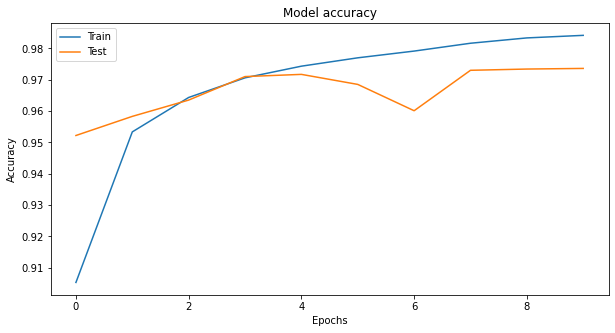

In [16]:
# Plot traning and validation accuracy values
# plt.style.use(['dark_background'])
fig, ax = plt.subplots(figsize=(10, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

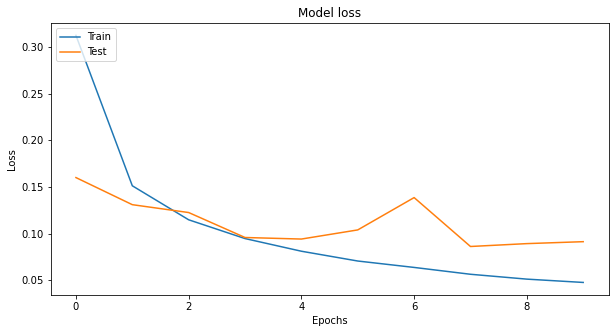

In [17]:
# Plot training & validation loss values
# plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [18]:
model.predict(x_val_float)

array([[4.8387314e-12, 1.0726486e-09, 1.0850512e-08, ..., 9.9999857e-01,
        5.3506355e-09, 9.4828358e-08],
       [6.5261074e-11, 1.2907316e-07, 9.9999988e-01, ..., 7.9798647e-11,
        6.1458988e-10, 1.5781916e-15],
       [1.5200186e-07, 9.9998403e-01, 8.4055758e-09, ..., 1.1745504e-05,
        1.1438000e-07, 4.9470077e-11],
       ...,
       [2.3925397e-17, 6.3000183e-09, 2.3409455e-16, ..., 9.2613019e-09,
        4.6231802e-10, 1.1217167e-08],
       [6.1217240e-14, 1.7390084e-12, 1.3106660e-12, ..., 3.8893385e-12,
        6.8618641e-07, 4.5775947e-17],
       [9.1534609e-14, 9.3950555e-16, 2.3982495e-13, ..., 2.9699300e-15,
        1.9137268e-12, 1.0822718e-12]], dtype=float32)

In [19]:
# Predict Classes
predicts = np.argmax(model.predict(x_val_float), axis=1)
print(predicts)

[7 2 1 ... 4 5 6]


In [20]:
print("Accuracy: ", accuracy_score(y_val, predicts))

Accuracy:  0.9736
